# Optimizers

In [1]:
import numpy as np
np.random.seed(222)
import tensorflow as tf
tf.random.set_seed(222)
from matplotlib import pyplot as plt
%matplotlib inline
import skimage.io as io
import skimage.transform as T

In [2]:
from neural_stylization.transfer_style import Stylizer
from neural_stylization.optimizers import GradientDescent, Adam, L_BFGS
from neural_stylization.util.build_callback import build_callback

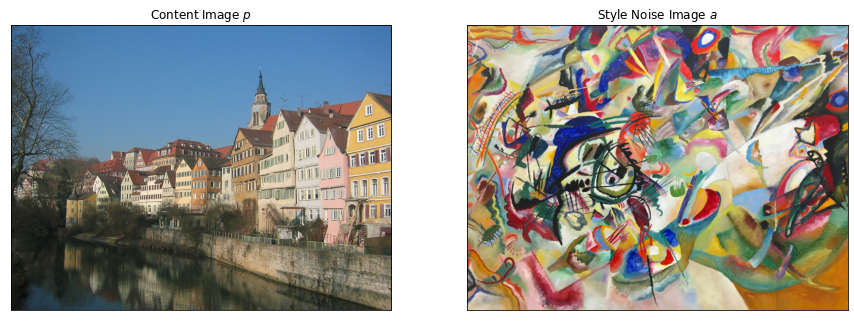

In [3]:
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
content = io.imread('img/content/tubingen.jpg')
ax = plt.imshow(content)
plt.title('Content Image $p$')
ax.axes.xaxis.set_major_locator(plt.NullLocator())
ax.axes.yaxis.set_major_locator(plt.NullLocator())
plt.subplot(1, 2, 2)
style = io.imread('img/styles/composition-vii.jpg')
style = T.resize(style, content.shape[:-1], preserve_range=True).astype('uint8')
ax = plt.imshow(style)
plt.title('Style Noise Image $a$')
ax.axes.xaxis.set_major_locator(plt.NullLocator())
ax.axes.yaxis.set_major_locator(plt.NullLocator())

In [4]:
def stylize(optimizer, iterations: int):
    """
    Stylize the image.
    
    Args:
        optimizer: the optimizer method to use
        iterations: the number of iterations to optimize
        
    Returns: a stylized image
    """
    output = Stylizer(content_weight=1, style_weight=1e4)(
        content=content,
        style=style,
        optimize=optimizer,
        iterations=iterations,
        callback=build_callback('build/loss/{}'.format(optimizer.__class__.__name__))
    )
    io.imsave('img/loss/{}.jpg'.format(optimizer.__class__.__name__), output)

In [5]:
# the maximum number of times each optimizer is allowed to 
# evaluate the gradients before termination
max_evaluations = 250

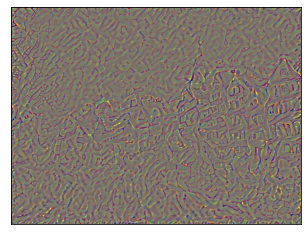

100%|██████████| 250/250 [04:35<00:00,  1.10s/it]


In [6]:
gd = GradientDescent(learning_rate=5e-7)
stylize(gd, max_evaluations)

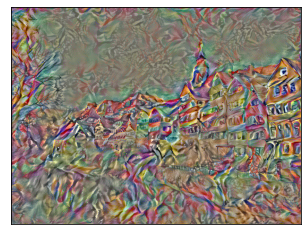

100%|██████████| 250/250 [03:49<00:00,  1.09it/s]


In [7]:
adam = Adam(learning_rate=1e2)
stylize(adam, max_evaluations)

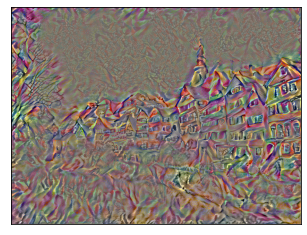

100%|██████████| 12/12 [03:53<00:00, 19.46s/it]


In [8]:
# L-BFGS has its own maximum evaluation per iteration setting
lbfgs = L_BFGS(max_evaluations=20)
stylize(lbfgs, max_evaluations // 20)

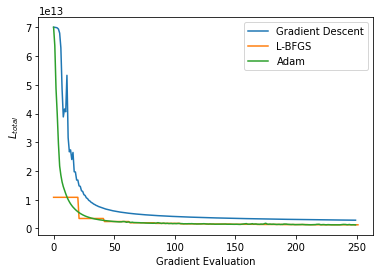

In [9]:
plt.plot(gd.loss_history)
plt.plot(lbfgs.loss_history)
plt.plot(adam.loss_history)
plt.legend(['Gradient Descent', 'L-BFGS', 'Adam'])
plt.ylabel('$L_{total}$')
plt.xlabel('Gradient Evaluation')
plt.savefig('img/loss/plot.png', bbox_inches='tight')